In [95]:
#-----------------------------------------------------------------------------------------------------------------------------
#------------------------ En este documento se realiza un analísis de series de tiempo -------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------


#BASE DE DATOS CLIMATOLOGICA

#ESTACION  : 26131
#NOMBRE    : NAVOJOA (FFCC)
#ESTADO    : SONORA
#MUNICIPIO : NAVOJOA
#LATITUD   : 027.081°
#LONGITUD  : -109.445°
#ALTITUD   : 41 msnm
#EMISION   : 06/04/2020

#Importamos las librerias numpy y pandas para manejo y operaciones.
import numpy as np
import pandas as pd
#Importamos seaborn y matplotlib para la visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
#Importamos statsmodels para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm


In [77]:
#-----------------------------------------------------------------------------------------------------------------------------
#------------------------ Preprocesamiento de datos basado en el documento anterior a este------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------

#Leyendo el texto de Climatologia Navojoa
df0 = pd.read_csv('ClimatologiaNavojoa.txt', skiprows=19, sep='\s+', names=["Fecha", "Precip (mm)", "Evap (mm)","Tmax (°C)","Tmin (°C)"]) 

#Cambiamos las variables de tipo Nulo a tipo NaN para poder trabajar con ellas
df0.replace("Nulo", np.NaN, inplace=True)

#Eliminamos la columna evaporación por no tender datos
df0.drop("Evap (mm)", axis=1, inplace=True)
#Eliminamos la fila 13404 por no contener datos importantes
df0.drop(13404, axis=0, inplace=True)

#Cambiamos las columnas de precipitación, evaporación, temperatura maxima y minima a numeros flotantes
df0["Precip (mm)"]= pd.to_numeric(df0["Precip (mm)"])
df0["Tmax (°C)"]= pd.to_numeric(df0["Tmax (°C)"])
df0["Tmin (°C)"]= pd.to_numeric(df0["Tmin (°C)"]) 

#Comenzaremos a trabajar con las fechas, por lo que crearemos una copia
df=df0.copy()

#Cambiamos el tipo de "Fecha" a un tipo que sea reconocible como fecha para python.
df["Fecha"]= pd.to_datetime(df["Fecha"], dayfirst=True)

#Creamos una columna para año y una para mes
df["Mes"]= df['Fecha'].dt.month
df["Año"]= df['Fecha'].dt.year

#Mostramos nuestros datos ya procesados
df.head()

,Fecha,Precip (mm),Tmax (°C),Tmin (°C),Mes,Año
0,1931-01-01,0.0,28.0,8.0,1,1931
1,1931-01-02,0.0,29.0,7.0,1,1931
2,1931-01-03,0.0,29.0,9.0,1,1931
3,1931-01-04,0.0,29.0,6.0,1,1931
4,1931-01-05,0.0,26.0,5.0,1,1931


In [78]:
#Creamos un Serie de Tiempo, fijando a la variable 'Fecha' como nuevo índice del DataFrame

#Copiamos el último DataFrame para realizar las operaciones nuevas de tiempo
df_st = df.copy()
#Redefinimos el índice de nuestro nuevo DataFrame de tiempo para que sea la variable 'Fecha'
df_st = df_st.set_index('Fecha')

# Verificamos
df_st.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13404 entries, 1931-01-01 to 1993-07-31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Precip (mm)  13370 non-null  float64
 1   Tmax (°C)    13322 non-null  float64
 2   Tmin (°C)    13293 non-null  float64
 3   Mes          13404 non-null  int64  
 4   Año          13404 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 628.3 KB


In [79]:
#Vemos el DataFrame ya indexado con la variable fecha
df_st

,Precip (mm),Tmax (°C),Tmin (°C),Mes,Año
Fecha,,,,,
1931-01-01,0.0,28.0,8.0,1,1931
1931-01-02,0.0,29.0,7.0,1,1931
1931-01-03,0.0,29.0,9.0,1,1931
1931-01-04,0.0,29.0,6.0,1,1931
1931-01-05,0.0,26.0,5.0,1,1931
...,...,...,...,...,...
1993-07-27,0.0,39.0,24.0,7,1993
1993-07-28,0.0,39.0,22.0,7,1993
1993-07-29,4.5,40.0,23.0,7,1993


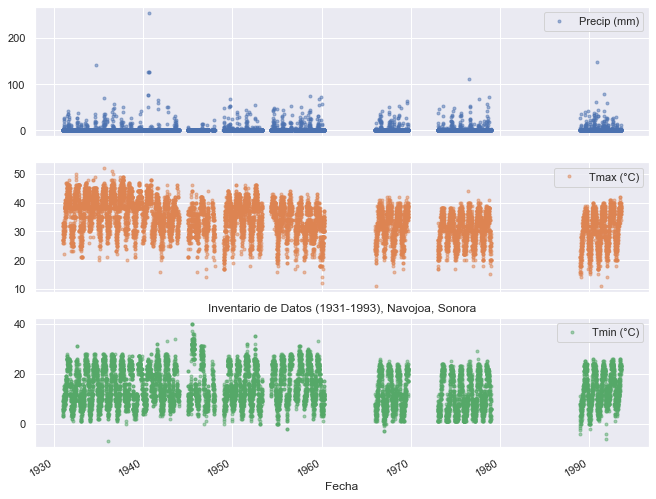

In [80]:
#Podemos visualizar la colección de los datos meteorológicos y ver si hay datos faltantes.

cols_plot = ['Precip (mm)', 'Tmax (°C)', 'Tmin (°C)']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_st[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos (1931-1993), Navojoa, Sonora');

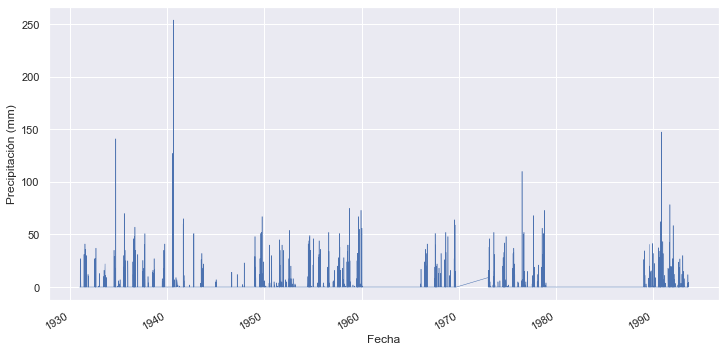

In [81]:
#Preparamos el entorno para la gráfica
sns.set(rc={'figure.figsize':(12, 6)})

# Calculamos el promedio
Precip_mean = df_st['Precip (mm)'].mean()


# Graficamos la precipitación de la serie de años
df_st['Precip (mm)'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');



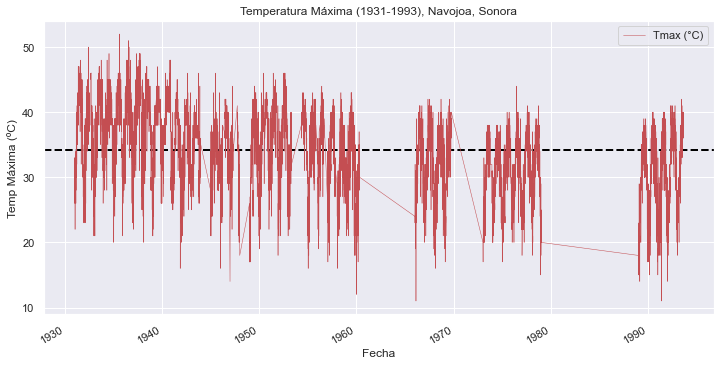

In [82]:
# Graficamos la Temperatura Máxima de los años registrados

#Preparamos el entorno junto con el tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedios
Tmax_mean = df_st["Tmax (°C)"].mean()


#Graficamos la linea de promedio
plt.axhline(Tmax_mean, color = 'black', linestyle='--', linewidth=2);

# Graficar la Temperatura
df_st['Tmax (°C)'].plot(linewidth=0.5, color="r");
plt.ylabel('Temp Máxima (ºC)');
plt.title('Temperatura Máxima (1931-1993), Navojoa, Sonora')

plt.legend();

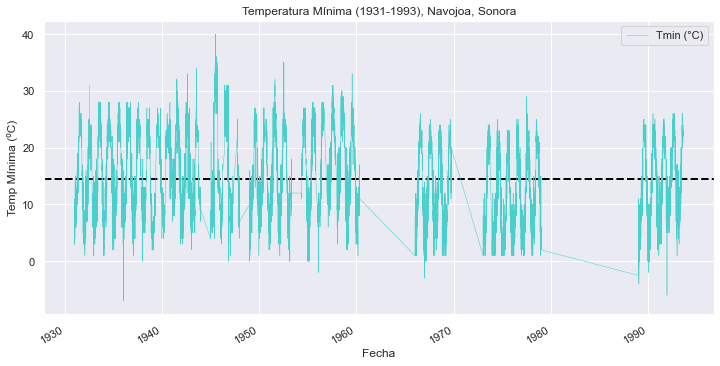

In [83]:
# Graficamos la Temperatura Mínima de los años registrados

#Preparamos el entorno junto con el tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

#Cálculamos el promedio
Tmin_mean = df_st["Tmin (°C)"].mean()


##Graficamos la linea de promedio
plt.axhline(Tmin_mean, color = 'black', linestyle='--', linewidth=2);

# Graficar la Temperatura
df_st['Tmin (°C)'].plot(linewidth=0.5, color="#48D1CC");
plt.ylabel('Temp Mínima (ºC)');
plt.title('Temperatura Mínima (1931-1993), Navojoa, Sonora')

plt.legend();

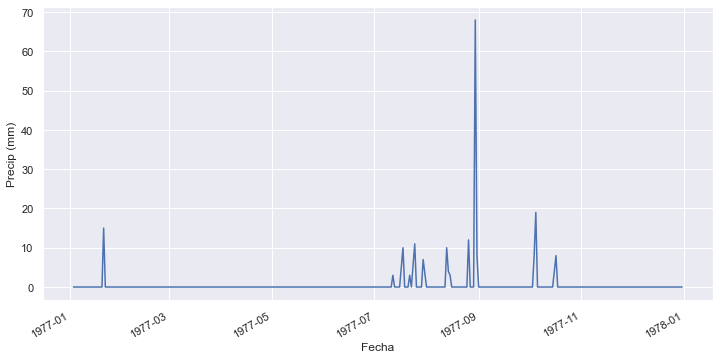

In [84]:
#Visualizamos el año 1977 en particular de los datos, usando la función df.loc() para filtrar ese año
ax = df_st.loc['1977', 'Precip (mm)'].plot()
ax.set_ylabel('Precip (mm)');

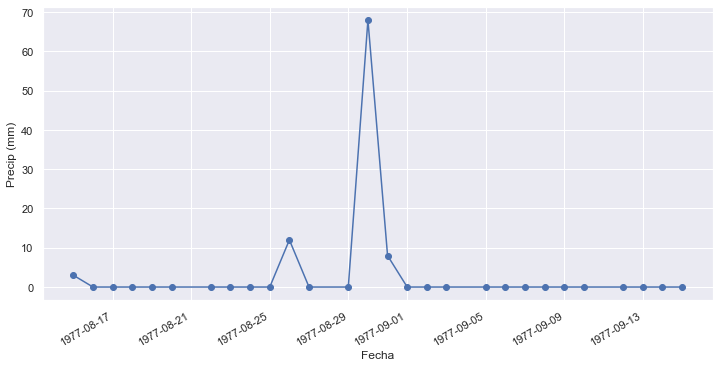

In [85]:
#Filtramos un periodo de los datos en el año 1977
ax = df_st.loc['1977-08-15':'1977-09-15', 'Precip (mm)'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');

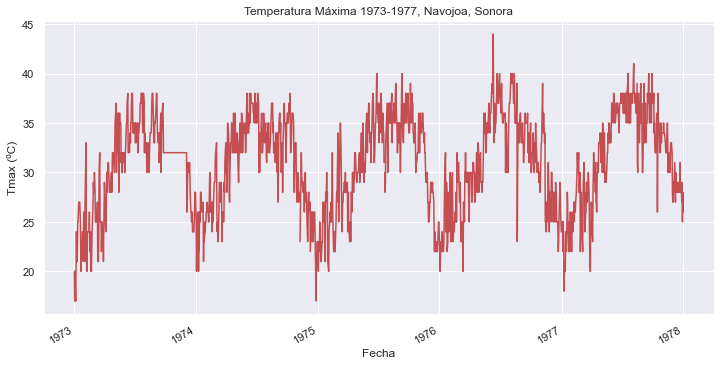

In [86]:
#Filtramos un rango de datos en la temperatura máxima entre el año 1973 y el año 1977
sns.set(rc={'figure.figsize':(12, 6)})

ax = df_st.loc['1973':'1977', "Tmax (°C)"].plot(color="r")
ax.set_ylabel('Tmax (ºC)');
ax.set_title('Temperatura Máxima 1973-1977, Navojoa, Sonora');

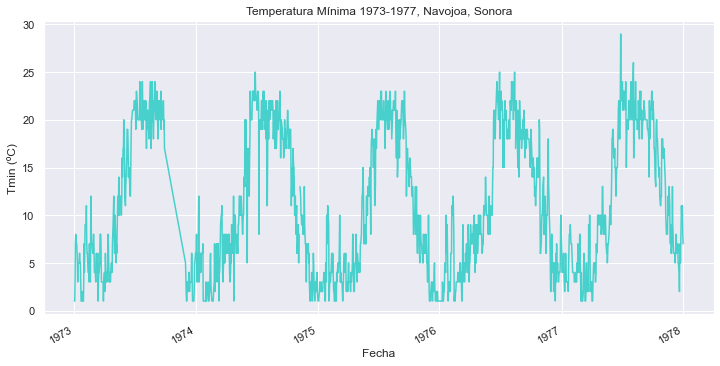

In [87]:
#Filtramos un rango de datos en la temperatura mínima entre el año 1973 y el año 1977
sns.set(rc={'figure.figsize':(12, 6)})

ax = df_st.loc['1973':'1977', "Tmin (°C)"].plot(color="#48D1CC")
ax.set_ylabel('Tmin (ºC)');
ax.set_title('Temperatura Mínima 1973-1977, Navojoa, Sonora');

In [88]:
#-----------------------------------------------------------------------------------------------------------------------------
#----------------  Ahora nuestro objetivo será suavizar la curva mediante promedios moviles ----------------------------------
#-----------------------------------------------------------------------------------------------------------------------------


# A pesar de que existen muchos tipos de promedios móviles, hoy sacaremos un promedio en un punto,
#considerando los valores de los puntos vecinos (puede ser centrado o histórico), y podemos también
#dar un peso (grado de influencia) de los puntos vecinos (Ej. Promedio móvil Exponencial y otros).


# Suavizando la curva de Temperatura máxima, utilizando Promedios Móviles (7,30 y 365 días)
data_cols = ['Precip (mm)', 'Tmax (°C)', 'Tmin (°C)']
df_st_7d = df_st[data_cols].rolling(7, center=True).mean()
df_st_30d = df_st[data_cols].rolling(30, center=True).mean()
df_st_365d = df_st[data_cols].rolling(365, center=True).mean()


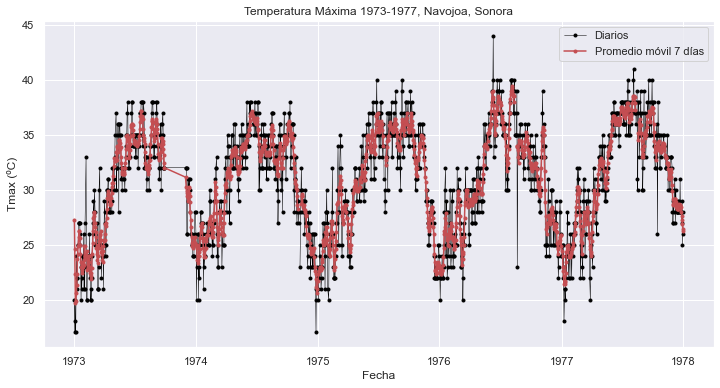

In [89]:
#Establecemos las variables de la fecha de inicio y fin
start, end = '1973-01', '1977-12'

#Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_st.loc[start:end, 'Tmax (°C)'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios', color="black")
ax.plot(df_st_7d.loc[start:end, 'Tmax (°C)'], marker='.', linestyle='-', label='Promedio móvil 7 días', color="r")

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 1973-1977, Navojoa, Sonora')
ax.legend();

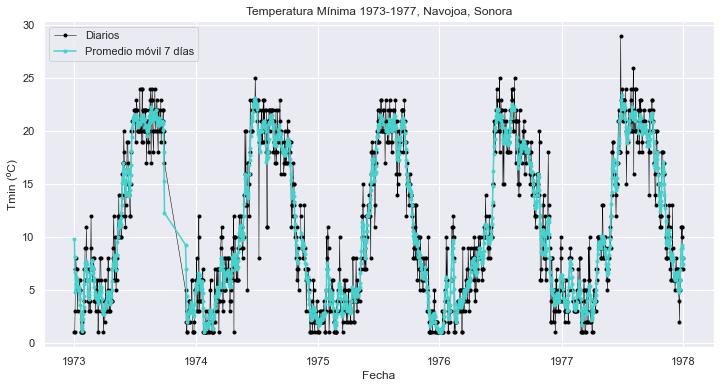

In [90]:
#Establecemos las variables de la fecha de inicio y fin
start, end = '1973-01', '1977-12'

#Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_st.loc[start:end, 'Tmin (°C)'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios', color="black")
ax.plot(df_st_7d.loc[start:end, 'Tmin (°C)'], marker='.', linestyle='-', label='Promedio móvil 7 días', color="#48D1CC")

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 1973-1977, Navojoa, Sonora')
ax.legend();

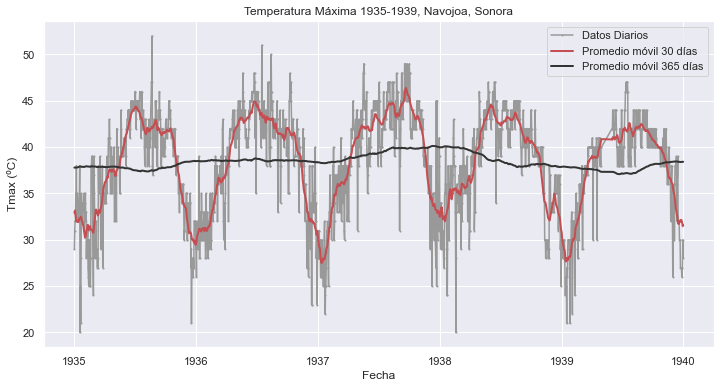

In [91]:
#Ahora haremmos la gráfica del año 1935 al año 1939 con la tendencia año con año

#Establecemos las variables de la fecha de inicio y fin
start, end = '1935-01', '1939-12'

#Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_st.loc[start:end, 'Tmax (°C)'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
#ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_st_30d.loc[start:end, 'Tmax (°C)'], linestyle='-', linewidth=2, label='Promedio móvil 30 días', color="r")
ax.plot(df_st_365d.loc[start:end, 'Tmax (°C)'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 1935-1939, Navojoa, Sonora')
ax.legend();

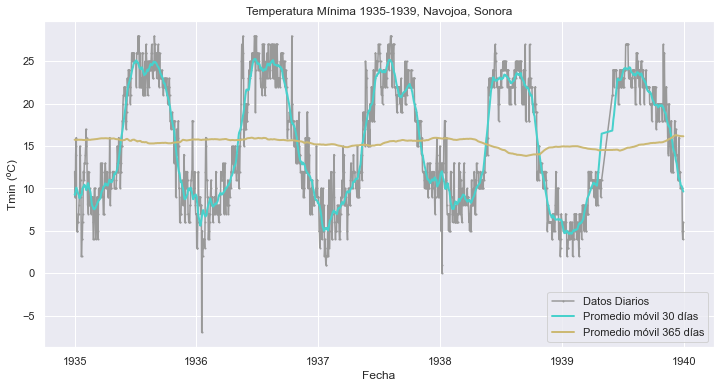

In [92]:
#Ahora haremmos la gráfica del año 1935 al año 1939 con la tendencia año con año

#Establecemos las variables de la fecha de inicio y fin
start, end = '1935-01', '1939-12'

#Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_st.loc[start:end, 'Tmin (°C)'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
#ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_st_30d.loc[start:end, 'Tmin (°C)'], linestyle='-', linewidth=2, label='Promedio móvil 30 días', color="#48D1CC")
ax.plot(df_st_365d.loc[start:end, 'Tmin (°C)'], linestyle='-', color='y', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 1935-1939, Navojoa, Sonora')
ax.legend();

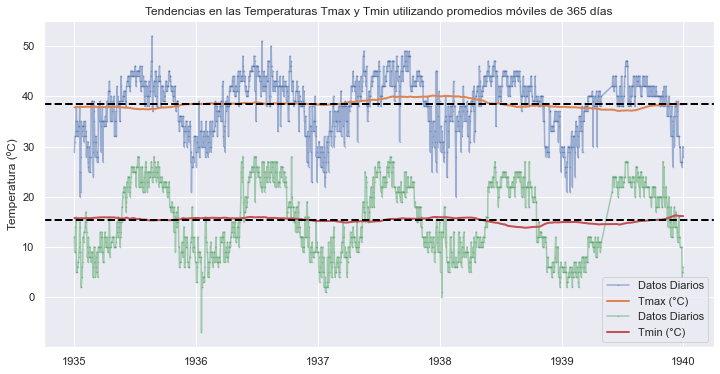

In [93]:
# Graficas de promedios móviles de 365 días para las variables de las Temperaturas tanto máxima como mínima  
sns.set(rc={'figure.figsize':(12, 6)})
#Establecemos las variables de la fecha de inicio y fin
start, end = '1935-01', '1939-12'

fig, ax = plt.subplots()
#Ciclo for que permita poner ambas graficas en el grid
for nm in ['Tmax (°C)', 'Tmin (°C)']:
    ax.plot(df_st.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_st_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_st.loc[start:end, nm].mean(), color = 'black', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');
